In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import joblib
import copy
import pandas as pd
import numpy as np
import os
PRJ_ROOT_DIR = os.path.dirname(os.path.abspath(''))

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Where to save the figures
NOTE_ROOT_DIR = os.path.abspath('')
CHAPTER_ID = "05_demo"
IMAGES_PATH = os.path.join(NOTE_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1 - Load the Data

In [3]:
# Load the integrated data
df_match = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "integrate", "matches.csv"))
df_match.head()

,home_result,season,defence/clean_sheets_0,defence/goals_conceded_0,defence/tackles_0,defence/tackle_success_%_0,defence/last_man_tackles_0,defence/blocked_shots_0,defence/interceptions_0,defence/clearances_0,...,goalkeeping/catches_26,goalkeeping/sweeper_clearances_26,goalkeeping/throw_outs_26,goalkeeping/goal_kicks_26,defence/recoveries_26,defence/duels_won_26,defence/duels_lost_26,teamplay/passes_26,teamplay/crosses_26,teamplay/accurate_long_balls_26
0,lose,2019/20,5.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1097.0,88.0,0.0
1,win,2019/20,6.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,win,2019/20,13.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,win,2019/20,11.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0,13.0,0.0
4,win,2019/20,13.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0


In [4]:
# Replace -100 with 0 (statistics' value of empty positions)
df_match = df_match.replace(-100, 0)
df_match.head()

,home_result,season,defence/clean_sheets_0,defence/goals_conceded_0,defence/tackles_0,defence/tackle_success_%_0,defence/last_man_tackles_0,defence/blocked_shots_0,defence/interceptions_0,defence/clearances_0,...,goalkeeping/catches_26,goalkeeping/sweeper_clearances_26,goalkeeping/throw_outs_26,goalkeeping/goal_kicks_26,defence/recoveries_26,defence/duels_won_26,defence/duels_lost_26,teamplay/passes_26,teamplay/crosses_26,teamplay/accurate_long_balls_26
0,lose,2019/20,5.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1097.0,88.0,0.0
1,win,2019/20,6.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,win,2019/20,13.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,win,2019/20,11.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0,13.0,0.0
4,win,2019/20,13.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Load the identifiers of matches (full info of matches)
df_matchid = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "integrate", "matches_with_playerid.csv"))
df_matchid.head()

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,defence/duels_lost_26,teamplay/passes_26,teamplay/crosses_26,teamplay/accurate_long_balls_26,defence_26,attack_26,teamplay_26,goalkeeping_26,discipline_26,id_26
0,37096.0,219924.0,81012.0,55459.0,166640.0,-1.0,204480.0,101537.0,86934.0,57531.0,...,0.0,1097.0,88.0,0.0,4.277778,15.027500,138.360000,0.0,6.50,103025
1,37915.0,55605.0,173904.0,38290.0,158534.0,-1.0,157668.0,45268.0,231372.0,62974.0,...,-100.0,-100.0,-100.0,-100.0,-100.000000,-100.000000,-100.000000,-100.0,-100.00,-1
2,116535.0,169187.0,122798.0,171287.0,97032.0,-1.0,56979.0,41733.0,116643.0,-1.0,...,-100.0,-100.0,-100.0,-100.0,-100.000000,-100.000000,-100.000000,-100.0,-100.00,-1
3,98747.0,17761.0,51927.0,39487.0,68983.0,-1.0,60586.0,60551.0,433154.0,40145.0,...,0.0,248.0,13.0,0.0,1.888889,7.594167,30.696667,0.0,6.75,200439
4,51940.0,95658.0,214590.0,184667.0,106760.0,-1.0,74208.0,195851.0,176297.0,156689.0,...,-100.0,-100.0,-100.0,-100.0,-100.000000,-100.000000,-100.000000,-100.0,-100.00,-1


## 2 - Predict the Matches
For convenience, we will take the matches that appear in our database.

### 1 - Select the Match

In [6]:
# Select matches (suggested: recent match in database)
df_match_demo = df_match[df_match["season"] == "2021/22"]
df_match_demo.head()

,home_result,season,defence/clean_sheets_0,defence/goals_conceded_0,defence/tackles_0,defence/tackle_success_%_0,defence/last_man_tackles_0,defence/blocked_shots_0,defence/interceptions_0,defence/clearances_0,...,goalkeeping/catches_26,goalkeeping/sweeper_clearances_26,goalkeeping/throw_outs_26,goalkeeping/goal_kicks_26,defence/recoveries_26,defence/duels_won_26,defence/duels_lost_26,teamplay/passes_26,teamplay/crosses_26,teamplay/accurate_long_balls_26
715,win,2021/22,11.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
716,win,2021/22,11.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717,win,2021/22,20.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718,lose,2021/22,8.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719,win,2021/22,20.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Take one match
data = df_match_demo.loc[715]
data

home_result                            win
season                             2021/22
defence/clean_sheets_0                11.0
defence/goals_conceded_0              33.0
defence/tackles_0                      0.0
                                    ...   
defence/duels_won_26                   0.0
defence/duels_lost_26                  0.0
teamplay/passes_26                     0.0
teamplay/crosses_26                    0.0
teamplay/accurate_long_balls_26        0.0
Name: 715, Length: 1352, dtype: object

In [15]:
# Info of that match
df_matchid.iloc[715, :31]

home/gk_0                40836.0
home/df_0               244723.0
home/df_1                55494.0
home/df_2               174874.0
home/df_3                57328.0
home/df_4                   -1.0
home/mf_0               232787.0
home/mf_1                86417.0
home/mf_2               108413.0
home/mf_3                   -1.0
home/mf_4                   -1.0
home/fw_0                82403.0
home/fw_1               199670.0
home/fw_2               450542.0
away/gk_0                51940.0
away/df_0                95658.0
away/df_1               184667.0
away/df_2               216051.0
away/df_3               152590.0
away/mf_0               141746.0
away/mf_1               101582.0
away/mf_2               195851.0
away/mf_3               449434.0
away/mf_4               465527.0
away/fw_0                40720.0
away/fw_1                   -1.0
away/fw_2                   -1.0
home/name         Crystal Palace
away/name      Manchester United
home_result                  win
season    

### 2 - Load the Models

In [17]:
# Setup the pipeline of preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Setup to save/load the model
def save_model(model, id_):
    print("Saving model", id_)
    joblib.dump(model, os.path.join(NOTE_ROOT_DIR, "models", id_ + ".pkl"))
def load_model(id_):
    print("Loading model", id_)
    return joblib.load(os.path.join(NOTE_ROOT_DIR, "models", id_ + ".pkl"))

# Load the preprocessing pipelines & the best model
model = load_model("forest_bayes_search")
pipe_predictor = load_model("pipe_predictor_preprocess")
pipe_label = load_model("pipe_label_preprocess")

Loading model forest_bayes_search
Loading model pipe_predictor_preprocess
Loading model pipe_label_preprocess


### 3 - Prediction

In [46]:
# Predict the match result
X_new, y_new = data.values[2:], data.values[0:1]
X_new_prep, y_new_prep = pipe_predictor.transform(X_new.reshape(1, -1)), pipe_label.transform(y_new.reshape(1, -1))
pipe_label["encoder"].inverse_transform(model.predict(X_new_prep).reshape(1, -1))

array([['win']], dtype=object)

In [47]:
# Check the true result
y_new

array(['win'], dtype=object)

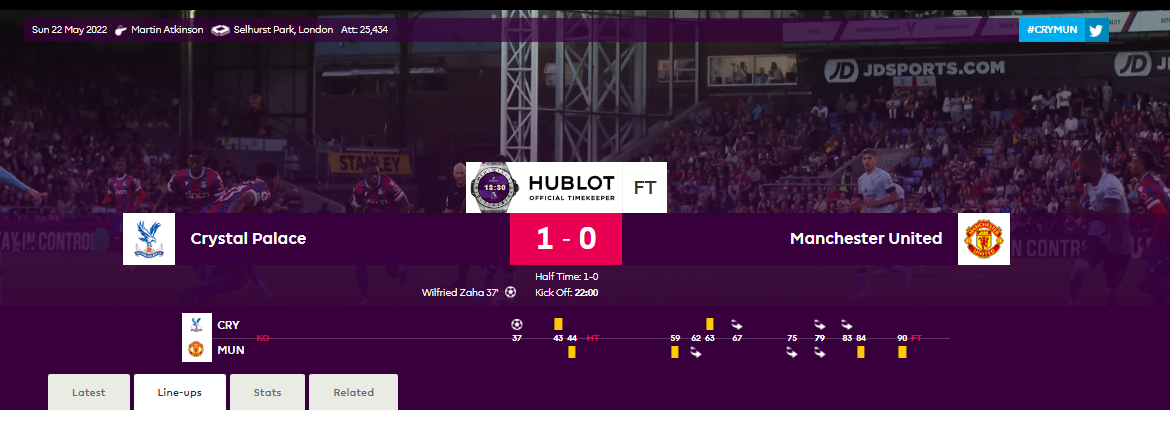

In [ ]:
**LINK:**